In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


First, I'll bring in the raw data file so that I can see what I'm working with. I'll assign it to variable df20 so that it can more easily managed.

In [44]:
df20 = pd.read_csv('assets/Louisville_Metro_KY_-_Crime_Data_2020.csv', low_memory=False)

Let's check the dataframe to see what we're working with.

In [45]:
df20.head(3)

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE,ObjectId
0,80-20-000117,2020/01/01 13:50:00,2019/12/31 03:30:00,FRAUD,FRAUD USE OF CREDIT CARD AFTER REPT LOST/STOLE...,26B,PART II,COMPLETED,4TH DIVISION,435,SERVICE / GAS STATION,4100 BLOCK TAYLOR BLVD ...,LOUISVILLE,40215,1
1,80-20-000292,2020/01/02 10:45:00,2019/12/31 18:00:00,THEFT/LARCENY,"TBUT OR DISP ALL OTHERS > $500 BUT < $10,000",23H,PART I,COMPLETED,6TH DIVISION,613,NON-ATTACHED RESD GARAGE/SHED/BULD,5200 BLOCK RUSSETT BLVD ...,LOUISVILLE,40218,2
2,80-19-096135,2020/01/01 00:26:00,2019/12/31 23:30:00,VEHICLE BREAK-IN/THEFT,TBUT OR DISP CONTENTS FROM VEH $500 OR > BUT <...,23F,PART I,COMPLETED,1ST DIVISION,112,HIGHWAY / ROAD / ALLEY,S 16TH ST / W CHESTNUT ST ...,LOUISVILLE,40203,3


Let's isolate the columns so that we can drop those that are unnecessary for the analysis.

In [46]:
df20.columns

Index(['INCIDENT_NUMBER', 'DATE_REPORTED', 'DATE_OCCURED', 'CRIME_TYPE',
       'UOR_DESC', 'NIBRS_CODE', 'UCR_HIERARCHY', 'ATT_COMP', 'LMPD_DIVISION',
       'LMPD_BEAT', 'PREMISE_TYPE', 'BLOCK_ADDRESS', 'City', 'ZIP_CODE',
       'ObjectId'],
      dtype='object')

Collect all unneccesary colums into a variable.

In [47]:
dropped_columns = ['INCIDENT_NUMBER','UOR_DESC', 'NIBRS_CODE', 'UCR_HIERARCHY', 'ATT_COMP', 'ObjectId', 'LMPD_BEAT', 'BLOCK_ADDRESS', 'City', 'DATE_OCCURED']

For the purposes of my analysis, I'm going to discard any columns that have no discernible effect on the data to be analyzed. To save these changes to the original dataset I'll use the inplace= True parameter. Using the dropped_columns variable, I'll neatly drop the columns I don't need.

In [48]:
df20.drop(columns= dropped_columns,inplace= True)


Here, I'm calling the .head function again in order to make sure that the previous function call executed correctly.

In [49]:
df20.head(1)

,DATE_REPORTED,CRIME_TYPE,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2020/01/01 13:50:00,FRAUD,4TH DIVISION,SERVICE / GAS STATION,40215


In [50]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70233 entries, 0 to 70232
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE_REPORTED  70233 non-null  object
 1   CRIME_TYPE     70233 non-null  object
 2   LMPD_DIVISION  70233 non-null  object
 3   PREMISE_TYPE   70225 non-null  object
 4   ZIP_CODE       70187 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


Next I'm going to bring in crime data from 2021 and 2022. Now that I know which columns I want to use, I can streamline the data import process.

In [51]:
df21 = pd.read_csv('assets/Louisville_Metro_KY_-_Crime_Data_2021.csv', usecols= ['DATE_REPORTED',
       'CRIME_TYPE', 'LMPD_DIVISION', 'PREMISE_TYPE', 'ZIP_CODE'], low_memory=False)
df21.head(1)

,DATE_REPORTED,CRIME_TYPE,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2021/01/01 04:10:00,VANDALISM,6TH DIVISION,RESIDENCE / HOME,40218.0


In [52]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72123 entries, 0 to 72122
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_REPORTED  72123 non-null  object 
 1   CRIME_TYPE     72123 non-null  object 
 2   LMPD_DIVISION  72123 non-null  object 
 3   PREMISE_TYPE   72114 non-null  object 
 4   ZIP_CODE       72098 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.8+ MB


In [53]:
df22 = pd.read_csv('assets/Louisville_Metro_KY_-_Crime_Data_2022.csv', usecols= ['DATE_REPORTED',
       'CRIME_TYPE', 'LMPD_DIVISION', 'PREMISE_TYPE', 'ZIP_CODE'], low_memory=False)
df22.head(1)

,DATE_REPORTED,CRIME_TYPE,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2022/01/02 16:49:00,DRUGS/ALCOHOL VIOLATIONS,6TH DIVISION,RESTAURANT,40218


In [54]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71506 entries, 0 to 71505
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE_REPORTED  71506 non-null  object
 1   CRIME_TYPE     71506 non-null  object
 2   LMPD_DIVISION  71506 non-null  object
 3   PREMISE_TYPE   71494 non-null  object
 4   ZIP_CODE       71475 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


In [55]:
# Change zip code to a string to streamline concatenation. Functionally, zip codes are zones on a map, which are objects.
df21['ZIP_CODE']= df21['ZIP_CODE'].astype('str')

In [56]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72123 entries, 0 to 72122
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE_REPORTED  72123 non-null  object
 1   CRIME_TYPE     72123 non-null  object
 2   LMPD_DIVISION  72123 non-null  object
 3   PREMISE_TYPE   72114 non-null  object
 4   ZIP_CODE       72123 non-null  object
dtypes: object(5)
memory usage: 2.8+ MB


Now let's join all of the dataframes into one in order to more efficiently format and clean them up at once. We'll use the concatenation function to achieve this.

In [60]:
combined_df = pd.concat([df20,df21,df22], ignore_index= True)

# Check our work
combined_df.info()
combined_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213862 entries, 0 to 213861
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   DATE_REPORTED  213862 non-null  object
 1   CRIME_TYPE     213862 non-null  object
 2   LMPD_DIVISION  213862 non-null  object
 3   PREMISE_TYPE   213833 non-null  object
 4   ZIP_CODE       213785 non-null  object
dtypes: object(5)
memory usage: 8.2+ MB


,DATE_REPORTED,CRIME_TYPE,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2020/01/01 13:50:00,FRAUD,4TH DIVISION,SERVICE / GAS STATION,40215
1,2020/01/02 10:45:00,THEFT/LARCENY,6TH DIVISION,NON-ATTACHED RESD GARAGE/SHED/BULD,40218
2,2020/01/01 00:26:00,VEHICLE BREAK-IN/THEFT,1ST DIVISION,HIGHWAY / ROAD / ALLEY,40203
3,2020/01/01 23:57:00,VANDALISM,4TH DIVISION,HIGHWAY / ROAD / ALLEY,40208
4,2020/01/02 11:02:00,VEHICLE BREAK-IN/THEFT,7TH DIVISION,DOCK/WHARF/FREIGHT/MODAL TERMINAL,40219
...,...,...,...,...,...
213857,2022/12/24 10:15:00,THEFT/LARCENY,3RD DIVISION,DRUG STORE/DR`S OFFICE/HOSPITAL,40216
213858,2022/12/24 15:38:00,THEFT/LARCENY,1ST DIVISION,HOTEL / MOTEL / ETC.,40202
213859,2022/12/25 14:06:00,VANDALISM,1ST DIVISION,RESIDENCE / HOME,40203
213860,2022/12/25 14:06:00,MOTOR VEHICLE THEFT,1ST DIVISION,RESIDENCE / HOME,40203


Let's clean the combined dataframe up a bit more.

In [62]:
# Let's rename and reformat these columns.
combined_df.rename(columns={'DATE_REPORTED': 'date', 'CRIME_TYPE':'crime', 'LMPD_DIVISION': 'lmpd', 'PREMISE_TYPE': 'premise', 'ZIP_CODE':'zip_code'},inplace=True)

In [72]:
# Convert the date column to datetime and simplify dates to month/year format. Changing date/time settings: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
combined_df['date']= combined_df['date'].astype('datetime64[ns]').dt.strftime('%B %Y')
combined_df

,date,crime,lmpd,premise,zip_code
0,January 2020,FRAUD,4TH DIVISION,SERVICE / GAS STATION,40215
1,January 2020,THEFT/LARCENY,6TH DIVISION,NON-ATTACHED RESD GARAGE/SHED/BULD,40218
2,January 2020,VEHICLE BREAK-IN/THEFT,1ST DIVISION,HIGHWAY / ROAD / ALLEY,40203
3,January 2020,VANDALISM,4TH DIVISION,HIGHWAY / ROAD / ALLEY,40208
4,January 2020,VEHICLE BREAK-IN/THEFT,7TH DIVISION,DOCK/WHARF/FREIGHT/MODAL TERMINAL,40219
...,...,...,...,...,...
213857,December 2022,THEFT/LARCENY,3RD DIVISION,DRUG STORE/DR`S OFFICE/HOSPITAL,40216
213858,December 2022,THEFT/LARCENY,1ST DIVISION,HOTEL / MOTEL / ETC.,40202
213859,December 2022,VANDALISM,1ST DIVISION,RESIDENCE / HOME,40203
213860,December 2022,MOTOR VEHICLE THEFT,1ST DIVISION,RESIDENCE / HOME,40203


In [87]:
# Drop rows with null values.
combined_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213756 entries, 0 to 213861
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      213756 non-null  object
 1   crime     213756 non-null  object
 2   lmpd      213756 non-null  object
 3   premise   213756 non-null  object
 4   zip_code  213756 non-null  object
dtypes: object(5)
memory usage: 9.8+ MB


In [89]:
# Save new dataframe as new csv.
combined_df.to_csv('assets/Combined_Louisville_Metro_KY_Crime_Data_2020_2021_2022.csv')

<!-- TO BE DELETED: I can see that most of the columns are currently typed as objects, which is actually fine for this project. I'll attempt to re-type the 'DATE_OCCURED' column as datetime because the column is representing actually representing dates. -->

In [71]:
# TO BE DELETED: df20['DATE_OCCURED']= pd.to_datetime(df20['DATE_OCCURED'])

In [75]:
# TO BE POSSIBLY DELETED
# combined_df.sort_values(by= ['date'], ascending= True)

In [ ]:
# TO BE DELETED
# Filtering out non-2020 data. https://stackoverflow.com/questions/70795156/filter-for-multiple-years-pandas
# df20['DATE_OCCURED'].dt.year.isin([2020])
# df20 = df20[pd.to_datetime(df20['DATE_OCCURED']).dt.year.isin([2020])]

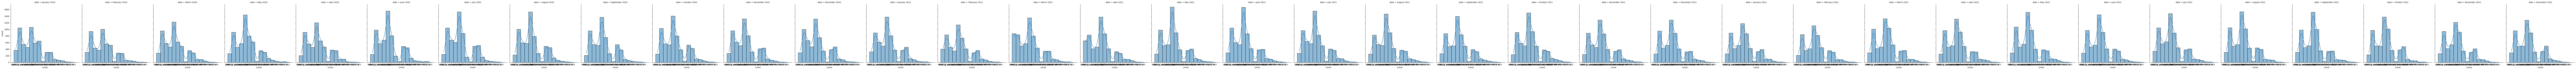

In [79]:
sns.displot(data=combined_df, x="crime", col="date", kde=True)



In [81]:
combined_df.crime.value_counts()

ASSAULT                     49310
THEFT/LARCENY               34245
OTHER                       30294
VEHICLE BREAK-IN/THEFT      18562
VANDALISM                   18396
DRUGS/ALCOHOL VIOLATIONS    14785
BURGLARY                    13609
MOTOR VEHICLE THEFT         13601
FRAUD                       10853
ROBBERY                      3720
WEAPONS                      2830
SEX CRIMES                   1593
DISTURBING THE PEACE         1038
HOMICIDE                      527
ARSON                         495
DUI                             4
Name: crime, dtype: int64

With our newly cleaned data, let's start deriving some initial insights from it. Let's simple and...

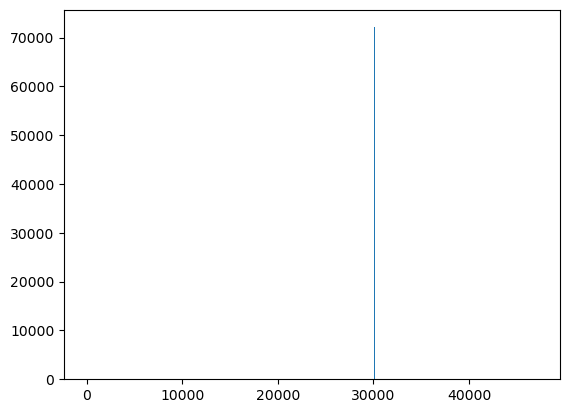

IndexError: index 10 is out of bounds for axis 0 with size 7

In [ ]:
plt.bar(ndf['ZIP_CODE'], len(ndf['CRIME_TYPE']))
plt.show()
ndf.plot(kind = 'bar', x = 'ZIP_CODE', y = [len("CRIME_TYPE")])
